# Dandiset 001176: Cortical acetylcholine dynamics are predicted by cholinergic axon activity and behavior state

**IMPORTANT**: This notebook was AI-generated using dandi-notebook-gen and has **not been fully verified**. Please be careful when interpreting any results or analyses herein.

This Dandiset provides simultaneous in vivo cortical imaging data of acetylcholine (ACh) sensors and GCaMP-expressing axons recorded during spontaneous behavioral state changes in awake mice.

**Dandiset metadata summary:**
* **Dandiset ID:** 001176 (draft)
* **Title:** Cortical acetylcholine dynamics are predicted by cholinergic axon activity and behavior state
* **Description:** Imaging data capturing cortical ACh activity, axonal activity, and behavioral measures like pupil size during state changes.
* **Contributors:** NIH; Jacob Reimer; Erin Neyhart
* **Date Created:** 2024-08-20
* **Keywords:** acetylcholine, brain states, two-photon imaging, neuromodulator, axon imaging
* **License:** CC-BY-4.0 (Open Access)
* **Techniques:** behavioral, analytical, surgical

## List of Dandiset Assets

Use DANDI API client to get the list of assets (NWB files):

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001176")
assets = list(dandiset.get_assets())
assets[:5]  # preview first five assets

[RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7ff6efb10950>, identifier='7c7c1782-8b43-4fb0-9267-ca505d6ba0e9', path='sub-16/sub-16_ses-16-4-2-Ach-M1_behavior+ophys.nwb', size=7766954, created=datetime.datetime(2025, 1, 7, 0, 10, 4, 465612, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 1, 7, 0, 10, 4, 465635, tzinfo=TzInfo(UTC)), blob='61137db4-ec6d-41d0-add9-afe24a2561b8', dandiset_id='001176', version_id='draft'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7ff6efb10950>, identifier='07ff70b6-ba5b-4a6e-9384-9230a4ab46c4', path='sub-18/sub-18_ses-18-1-2-Ach-M1_behavior+ophys.nwb', size=5001950, created=datetime.datetime(2025, 1, 7, 0, 10, 4, 548226, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 1, 7, 0, 10, 4, 548252, tzinfo=TzInfo(UTC)), blob='84e7a1a3-1a20-4ecb-ad8c-5bf239569259', dandiset_id='001176', version_id='draft'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7ff6efb10950>, identifier='4550467f

## Selected NWB file for demonstration

This notebook uses:

`sub-16/sub-16_ses-16-1-2-Ach-M1_behavior+ophys.nwb`

URL: https://api.dandiarchive.org/api/assets/4550467f-b94d-406b-8e30-24dd6d4941c1/download/

The code below shows how to load this NWB file remotely, following `dandi-notebook-gen-tools nwb-file-info` instructions.

In [2]:
import remfile
import h5py
import pynwb

url = "https://api.dandiarchive.org/api/assets/4550467f-b94d-406b-8e30-24dd6d4941c1/download/"
file = remfile.File(url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f)
nwb = io.read()

print(f"Loaded NWB session: {nwb.session_description}, Subject ID: {nwb.subject.subject_id}")

Loaded NWB session: Two-Photon in-vivo imaging, Subject ID: 16


## Exploring dataset structure and metadata

In [3]:
print("Available acquisitions:", list(nwb.acquisition.keys()))
print("Processing modules:", list(nwb.processing.keys()))
print("Subject info:", nwb.subject)
print("Session start:", nwb.session_start_time)

Available acquisitions: ['EyeTracking', 'PupilTracking', 'imageMeanIntensity', 'treadmill_velocity']
Processing modules: ['ophys']
Subject info: subject pynwb.file.Subject at 0x140681451237264
Fields:
  age: P406D
  age__reference: birth
  date_of_birth: 2023-03-20 00:00:00-05:51
  description: In vivo preparation of head-fix mice
  sex: F
  species: Mus musculus
  subject_id: 16

Session start: 2024-04-29 17:31:15-05:51


## Fluorescence Ach sensor recording (trace over time)

This is the raw fluorescence trace for one segmented ROI expressing the Ach sensor.

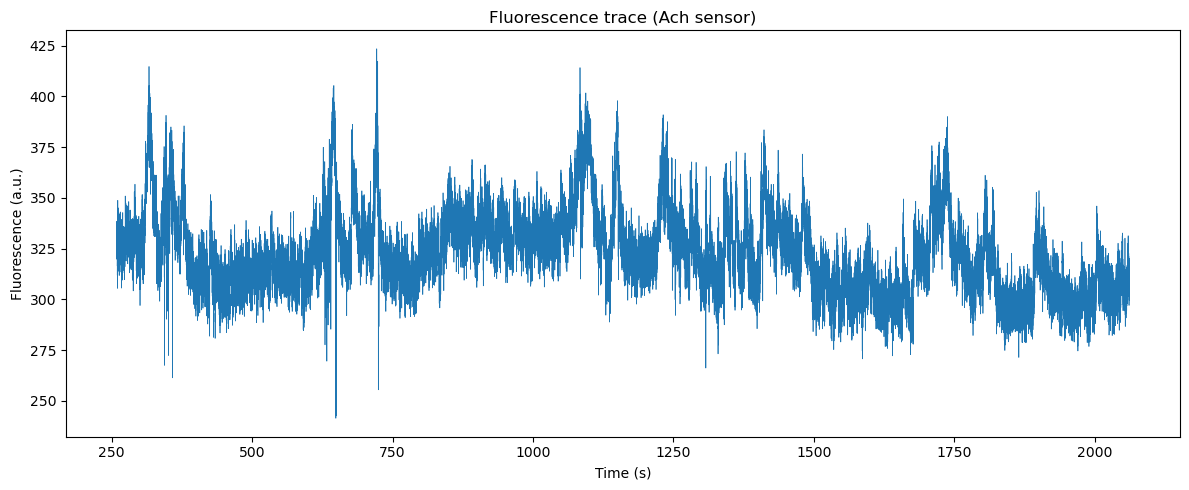

In [4]:
import matplotlib.pyplot as plt
import numpy as np

roi_response = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['RoiResponseSeries1']
timestamps = roi_response.timestamps[:]
fluorescence = roi_response.data[:, 0]

plt.figure(figsize=(12,5))
plt.plot(timestamps, fluorescence, lw=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Fluorescence trace (Ach sensor)')
plt.tight_layout()
plt.show()

This trace shows the dynamic fluctuations and noise typical in in vivo Ach imaging data. Further filtering or event detection could be performed depending on desired analyses.

## Pupil radius over time

This behavioral signal reflects arousal/state changes.

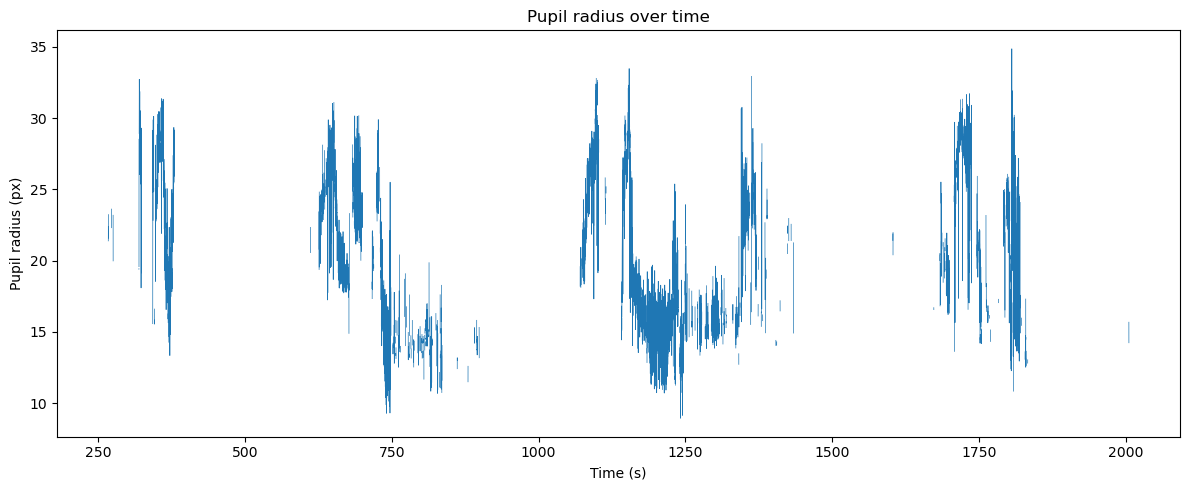

In [5]:
pupil_ts = nwb.acquisition['PupilTracking'].time_series['pupil_raw_radius']
pupil_times = pupil_ts.timestamps[:]
pupil_radius = pupil_ts.data[:]

plt.figure(figsize=(12,5))
plt.plot(pupil_times, pupil_radius, lw=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Pupil radius (px)')
plt.title('Pupil radius over time')
plt.tight_layout()
plt.show()

The pupil radius fluctuates and contains gaps/artifacts typical of behavioral tracking data.

## Eye position (X and Y) over time

Tracking of pupil center coordinates in pixels.

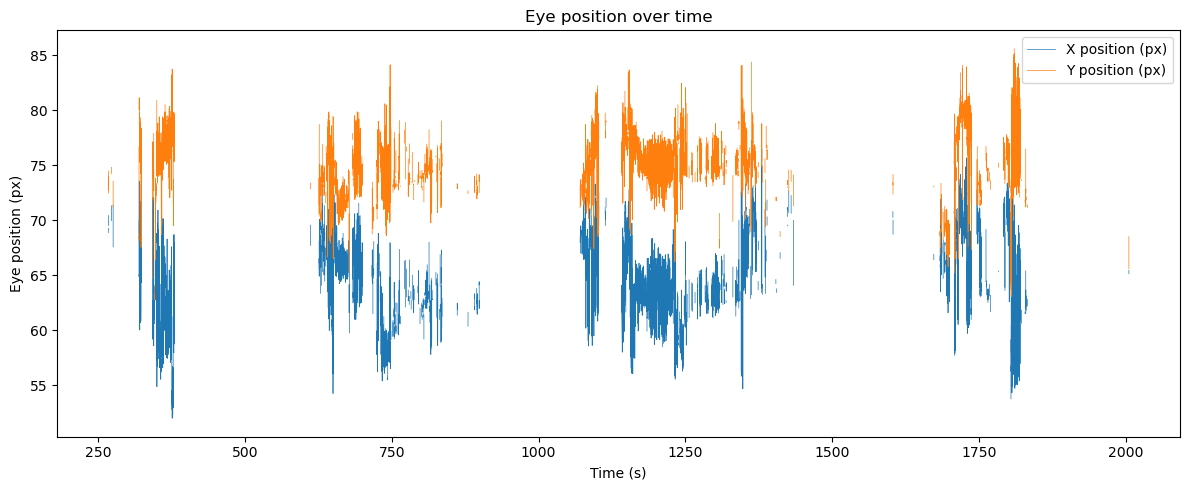

In [6]:
eye_spatial_series = nwb.acquisition['EyeTracking'].spatial_series['eye_position']
eye_times = eye_spatial_series.timestamps[:]
eye_pos = eye_spatial_series.data[:, :]

plt.figure(figsize=(12,5))
plt.plot(eye_times, eye_pos[:,0], label='X position (px)', lw=0.5)
plt.plot(eye_times, eye_pos[:,1], label='Y position (px)', lw=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Eye position (px)')
plt.legend()
plt.title('Eye position over time')
plt.tight_layout()
plt.show()

This visualization shows intermittent, noisy xy movements. Smoothing and segmentation can be used for detailed eye behavior analysis.

## Treadmill velocity over time

Locomotor activity during imaging.

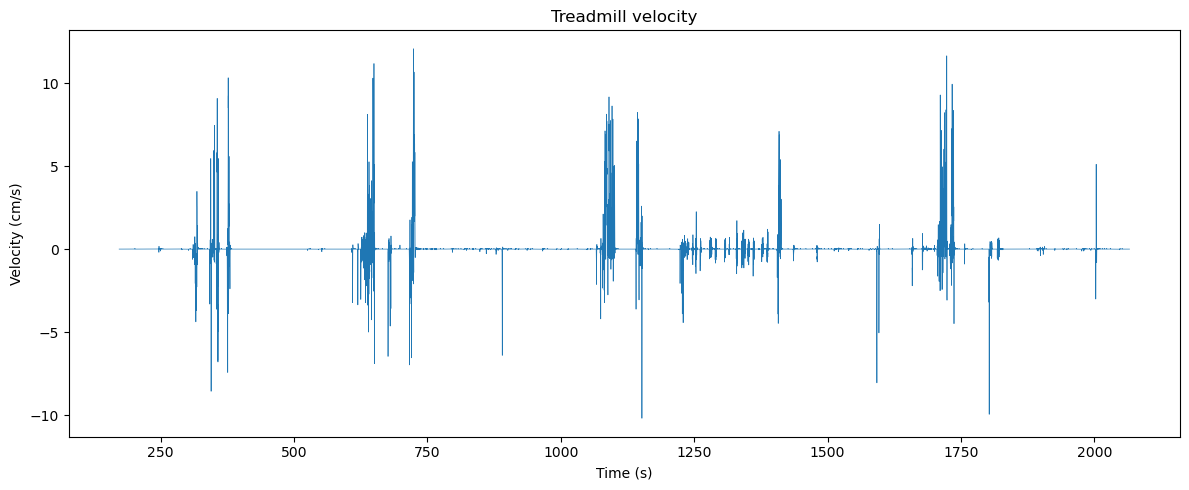

In [7]:
tm = nwb.acquisition['treadmill_velocity']
tm_times = tm.timestamps[:]
velocity = tm.data[:]

plt.figure(figsize=(12,5))
plt.plot(tm_times, velocity, lw=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')
plt.title('Treadmill velocity')
plt.tight_layout()
plt.show()

This plot reveals alternations between locomotor quiescence and bouts of movement, characteristic of awake behaving animals.

## Summary

This notebook provided basic guidance on exploring Dandiset 001176, including:
- Accessing the Dandiset programmatically
- Loading a representative NWB file remotely via Python
- Examining key metadata fields and dataset structure
- Visualizing neural signals (Ach sensor fluorescence)
- Exploring behavioral correlates (pupil size, eye movement, locomotion)

Use this as a starting point. Further analyses could include:
- Statistical comparisons across behavioral states
- Event-aligned averaging
- Signal correlation analyses

but such analyses require domain judgment and additional code development. Use appropriate caution interpreting observed fluctuations without quantification.